In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '../../data/Prac2/SAT_GPA.csv'
data = pd.read_csv(file_path)
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [3]:
X = data['SAT']
y = data['GPA']

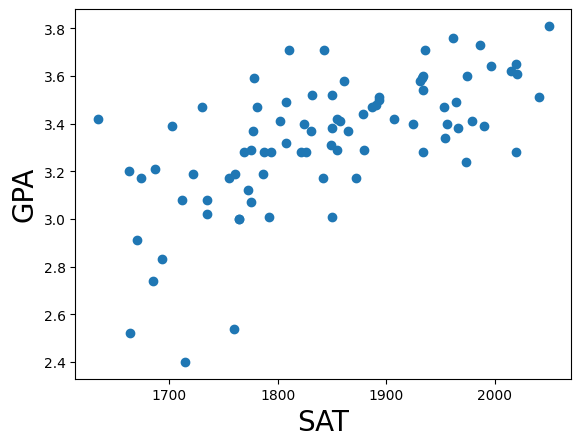

In [4]:
plt.scatter(X, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [5]:
k = 8

def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    
    return np.argsort(array_D)[:k]

data_len = len(X)

X_train = np.array(X[:64])
y_train = np.array(y[:64])

X_test = np.array(X[64:data_len])
y_test = np.array(y[64:data_len])

In [6]:
y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        y_pred[i] = y_pred[i] + y_train[id]
    y_pred[i] = y_pred[i]/len(indexis)
    print(y_pred[i], ' | ', y_test[i])

3.3925000000000005  |  3.51
3.2749999999999995  |  3.52
3.2949999999999995  |  3.52
3.3975000000000004  |  3.54
3.295  |  3.58
3.3974999999999995  |  3.58
3.3975000000000004  |  3.59
3.2587500000000005  |  3.59
3.3899999999999997  |  3.6
3.3975000000000004  |  3.6
3.3874999999999993  |  3.61
3.3874999999999993  |  3.62
3.3662499999999995  |  3.64
3.3874999999999993  |  3.65
3.2950000000000004  |  3.71
3.3975000000000004  |  3.71
3.30875  |  3.71
3.3662500000000004  |  3.73
3.37625  |  3.76
3.3874999999999993  |  3.81


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y_test, y_pred)

0.08137789062500003

In [8]:
mean_absolute_error(y_test, y_pred)

0.2711875000000001

In [9]:
r2_score(y_test, y_pred)

-10.951518670142466